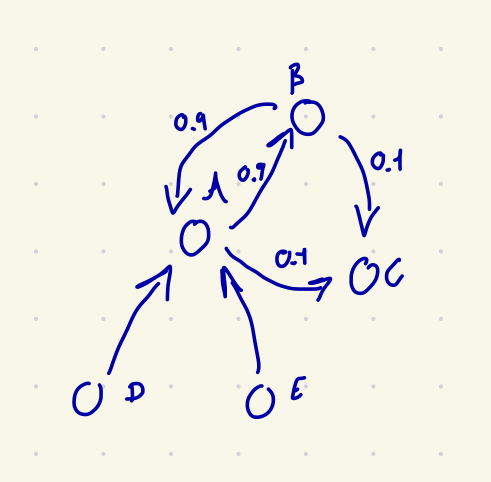
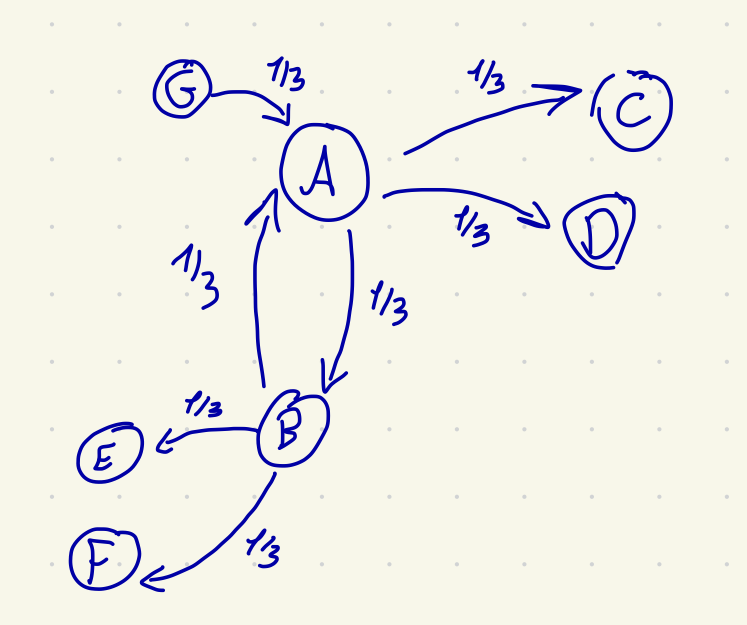

In [4]:
p_A, p_B, p_C, p_D, p_E = 1, 1, 1, 1, 1

num_iterations = 10000

for i in range(num_iterations):
    temp_A = p_A
    temp_B = p_B
    temp_C = p_C
    temp_D = p_D
    temp_E = p_E

    # A -0.9-> B
    p_B += 0.9 * temp_A
    p_A -= 0.9 * temp_A

    # A -0.1-> C
    p_C += 0.1 * temp_A
    p_A -= 0.1 * temp_A

    # B -0.9-> A
    p_A += 0.9 * temp_B
    p_B -= 0.9 * temp_B

    # B -0.1-> C
    p_C += 0.1 * temp_B
    p_B -= 0.1 * temp_B

    # D -> A
    p_A += temp_D
    p_D -= temp_D

    # E -> D
    p_D += temp_E
    p_E -= temp_E

print(p_A, p_B, p_C, p_D, p_E)


-2.5e-323 2.5e-323 4.999999999999992 0 0


in https://online-optimizer.appspot.com/?model=builtin:default.mod, this works:

var a >= 0;
var b >= 0;
var c >= 0;
var d >= 0;
var e >= 0;
var f >= 0;

maximize z: 0;

subject to c11: a = 1 + d + e + 0.9 * b;
subject to c21: b = 1 + 0.9 * a;
subject to c31: c = 1 + 0.1*a + 0.1*b;
subject to c41: d = 1 ;
subject to c51: e = 1;


end;


In [1]:
import sys, os

sys.path.append(os.path.abspath("/Users/DavidHolzwarth/Uni/EPFL/bachelors-thesis"))

from LP import resolve_delegations_LP, invert_graph

delegations = {
    'A': {'B': 0.9,
          'C': 0.1},   
    'B': {'A':0.9,
        'C': 0.1},
    'D': {'A': 1},
    'E': {'D': 1},
}
nodes = ['A', 'B', 'C', 'D', 'E']

print(resolve_delegations_LP(invert_graph(delegations), nodes))

OrderedDict({'Constraint_A': 1*A + -0.9*B + -1*D + -1.0 = 0, 'Constraint_B': -0.9*A + 1*B + -1.0 = 0, 'Constraint_C': -0.1*A + -0.1*B + 1*C + -1.0 = 0, 'Constraint_D': 1*D + -1*E + -1 = 0, 'Constraint_E': 1*E + -1 = 0, 'SinkNodesConstraint': 1*C + -5 = 0})
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/thesis/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/q9/0xq_2r1503z58vb1xx__4r5m0000gn/T/d0c9049579224bb89bf990fb044d0f2e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/q9/0xq_2r1503z58vb1xx__4r5m0000gn/T/d0c9049579224bb89bf990fb044d0f2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 25 RHS
At line 32 BOUNDS
At line 39 ENDATA
Problem MODEL has 6 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-6) rows, 0 (-6) columns and 0 (-12) elements